In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('/content/ICD10codes.csv')

In [3]:
data.head(10)

,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae","Cholera due to Vibrio cholerae 01, biovar cholerae.1",Cholera
0,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
1,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
2,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
3,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever
4,A010,2,A0102,Typhoid fever with heart involvement,Typhoid fever with heart involvement,Typhoid fever
5,A010,3,A0103,Typhoid pneumonia,Typhoid pneumonia,Typhoid fever
6,A010,4,A0104,Typhoid arthritis,Typhoid arthritis,Typhoid fever
7,A010,5,A0105,Typhoid osteomyelitis,Typhoid osteomyelitis,Typhoid fever
8,A010,9,A0109,Typhoid fever with other complications,Typhoid fever with other complications,Typhoid fever
9,A011,NaN,A011,Paratyphoid fever A,Paratyphoid fever A,Paratyphoid fever A


In [4]:
data.tail(10)

,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar cholerae","Cholera due to Vibrio cholerae 01, biovar cholerae.1",Cholera
19453,O3080,2,O30802,"Oth multiple gest, unsp num plcnta & amnio sac...","Other specified multiple gestation, unspecifie...","Other specified multiple gestation, unspecifie..."
19454,O3080,3,O30803,"Oth multiple gest, unsp num plcnta & amnio sac...","Other specified multiple gestation, unspecifie...","Other specified multiple gestation, unspecifie..."
19455,O3080,9,O30809,"Oth multiple gest, unsp num plcnta & amnio sac...","Other specified multiple gestation, unspecifie...","Other specified multiple gestation, unspecifie..."
19456,O3081,1,O30811,Oth mult gest w two or more monochorionic fetu...,Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19457,O3081,2,O30812,Oth mult gest w two or more monochorionic fetu...,Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19458,O3081,3,O30813,Oth mult gest w two or more monochorionic fetu...,Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19459,O3081,9,O30819,Oth mult gest w two or more monochorionic fetu...,Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19460,O3082,1,O30821,Oth multiple gest w two or more monoamnio fetu...,Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19461,O3082,2,O30822,"Oth mult gest w two or more monoamnio fetuses,...",Other specified multiple gestation with two or...,Other specified multiple gestation with two or...
19462,O3082,3,O30823,Oth multiple gest w two or more monoamnio fetu...,Other specified multiple gestation with two or...,NaN


## Data Preprocessing

In [5]:
data = data.rename(columns={
    'Cholera due to Vibrio cholerae 01, biovar cholerae': 'description',
    'A000': 'icd_code'})

In [6]:
df_dropped = data.drop('Cholera due to Vibrio cholerae 01, biovar cholerae.1', axis=1, inplace=True)
print(df_dropped)

None


In [7]:
data = data.rename(columns={'Cholera':'Disease_name'})

## Data Cleaning

In [8]:
data_cleaned = data[['description', 'icd_code']].dropna().drop_duplicates()


In [9]:
df_dropped = data.drop('A00', axis=1, inplace=True)
print(df_dropped)

None


In [10]:
data['icd_code'].nunique()
data['icd_code'].value_counts().head(10)

,count
icd_code,
O30823,1
A001,1
A009,1
A0100,1
A0101,1
A0102,1
A0103,1
O30109,1
O30111,1


In [11]:
# Clean description text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

data_cleaned['clean_description'] = data_cleaned['description'].apply(clean_text)

# Encode ICD codes
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cleaned['label'] = le.fit_transform(data_cleaned['icd_code'])

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['icd_code'])

In [13]:
data.head(20)

,0,icd_code,description,Disease_name,label
0,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",Cholera,0
1,9,A009,"Cholera, unspecified",Cholera,1
2,0,A0100,"Typhoid fever, unspecified",Typhoid fever,2
3,1,A0101,Typhoid meningitis,Typhoid fever,3
4,2,A0102,Typhoid fever with heart involvement,Typhoid fever,4
5,3,A0103,Typhoid pneumonia,Typhoid fever,5
6,4,A0104,Typhoid arthritis,Typhoid fever,6
7,5,A0105,Typhoid osteomyelitis,Typhoid fever,7
8,9,A0109,Typhoid fever with other complications,Typhoid fever,8
9,NaN,A011,Paratyphoid fever A,Paratyphoid fever A,9


In [14]:
# Clean description text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

data['clean_description'] = data['description'].apply(clean_text)

# Encode ICD codes
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['icd_code'])

In [15]:
## Extract the feature

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_sparse = tfidf.fit_transform(data['clean_description'])  # <== DEFINE X_sparse
y = data['label'].values


## Train the model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          59       0.00      0.00      0.00       1.0
          72       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          99 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Step 4 : Model Evaluation and training

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       1.0
          59       0.00      0.00      0.00       1.0
          72       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          99 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

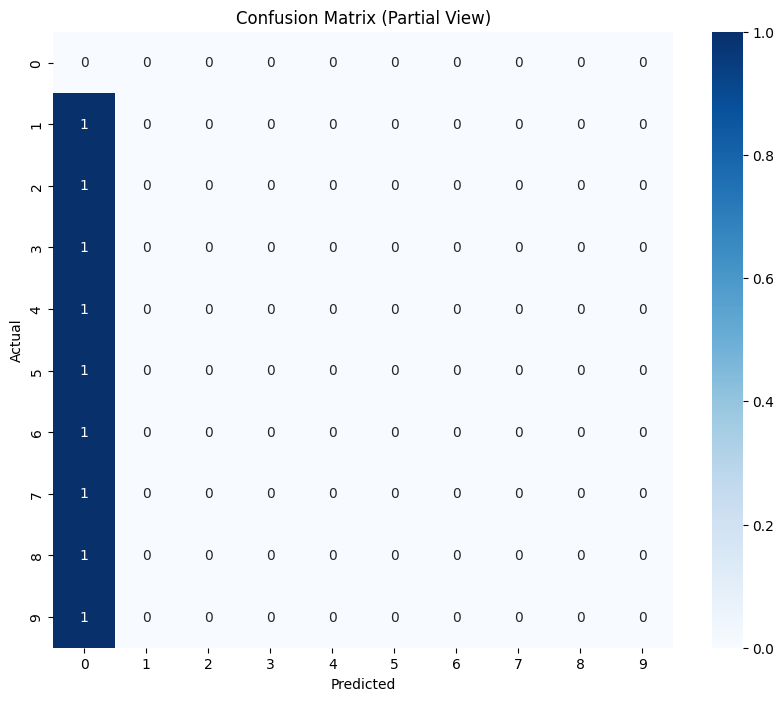

In [18]:
## visualize the confusion

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm[:10, :10], annot=True, fmt='d', cmap='Blues')  # First 10 labels for clarity
plt.title("Confusion Matrix (Partial View)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
text = "cholera due to vibrio cholerae 01, biovar eltor"
text_clean = clean_text(text)
vector = tfidf.transform([text_clean])
pred_label = model.predict(vector)
print("Predicted ICD Code:", le.inverse_transform(pred_label)[0])


Predicted ICD Code: A001
